![Drugs][1]
[1]: https://userscontent2.emaze.com/images/be06df67-79a3-4306-b063-41b28c4e48b5/df3118a7525eadc773930e507c09b54c.jpg

In [ ]:
# importações
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

In [ ]:
def porcentagem_uso(ds,start = 0 , slice = False):
  porcentagem_uso = []
  for i in ds.columns.to_list()[2:28:2]:
    soma_pessoas = 0
    for j in range(start,start + len(ds),1):
      soma_pessoas += ds['n'][j] * (ds[i][j] * 0.01)
    if (not slice):
      porcentagem_uso.append(float(100*soma_pessoas / sum(ds['n'])))
    else:
      porcentagem_uso.append(soma_pessoas)

  return porcentagem_uso


In [ ]:
drogas = pd.read_csv('drug-use-by-age.csv')
plt.style.use('seaborn-talk')
drogas.columns = ['idade', 'n', 'uso-álcool', 'frequência-álcool', 'uso-maconha', 'frequência-maconha',
                  'uso-cocaína', 'frequência-cocaína', 'uso-crack','frequência-crack', 'uso-heroína',
                  'frequência-heroína', 'uso-alucinógenos','frequência-alucinógenos', 'uso-inalantes',
                  'frequência-inalantes','uso-analgésicos', 'frequência-analgésicos', 'uso-oxicodona','frequência-oxicodona',
                  'uso-tranquilizantes', 'frequência-tranquilizantes','uso-estimulantes', 'frequência-estimulantes'
                  , 'uso-metanfetamina', 'frequência-metanfetamina','uso-sedativos', 'frequência-sedativos']

for i in drogas:
  for j in range(len(drogas[i])):
    if (drogas[i][j] == '-'):
      try:
        drogas[i][j] = (float(drogas[i][j-1])+float(drogas[i][j+1]))/2
      except:
        if j == 16:
          drogas[i][j] = float(drogas[i][j-1])/2
        elif j == 0:
          drogas[i][j] = float(drogas[i][j+1])/2
  
drogas[drogas.select_dtypes(exclude = 'number').columns.to_list()[1:]] = drogas[drogas.select_dtypes(exclude = 'number').columns.to_list()[1:]].astype('float')

drogas.head(6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,idade,n,uso-álcool,frequência-álcool,uso-maconha,frequência-maconha,uso-cocaína,frequência-cocaína,uso-crack,frequência-crack,uso-heroína,frequência-heroína,uso-alucinógenos,frequência-alucinógenos,uso-inalantes,frequência-inalantes,uso-analgésicos,frequência-analgésicos,uso-oxicodona,frequência-oxicodona,uso-tranquilizantes,frequência-tranquilizantes,uso-estimulantes,frequência-estimulantes,uso-metanfetamina,frequência-metanfetamina,uso-sedativos,frequência-sedativos
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,1.50,0.1,35.50,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,2.5,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.00,0.0,18.75,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,6.25,0.1,2.00,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.50,0.2,1.00,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.00,0.1,66.50,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.00,0.1,64.00,4.8,3.0,2.0,4.0,8.5,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5


In [ ]:
uso_drogas = pd.DataFrame(columns = ['Drogas','Porcentagem de uso','Total'], index = range(0, 13))
uso_drogas['Drogas'] = drogas.columns.to_list()[2:28:2]
uso_drogas['Drogas'] = uso_drogas['Drogas'].apply(lambda x: x.split('-')[1]) 

uso_drogas['Porcentagem de uso'] = porcentagem_uso(drogas)
uso_drogas = uso_drogas.sort_values('Porcentagem de uso')
uso_drogas['Total'] = [100.0]*len(uso_drogas['Drogas'])
uso_drogas

,Drogas,Porcentagem de uso,Total
12,sedativos,0.276131,100.0
3,crack,0.319082,100.0
4,heroína,0.353919,100.0
11,metanfetamina,0.376077,100.0
8,oxicodona,0.897349,100.0
6,inalantes,1.259881,100.0
10,estimulantes,1.811006,100.0
2,cocaína,2.161750,100.0
9,tranquilizantes,2.759050,100.0
5,alucinógenos,3.084273,100.0


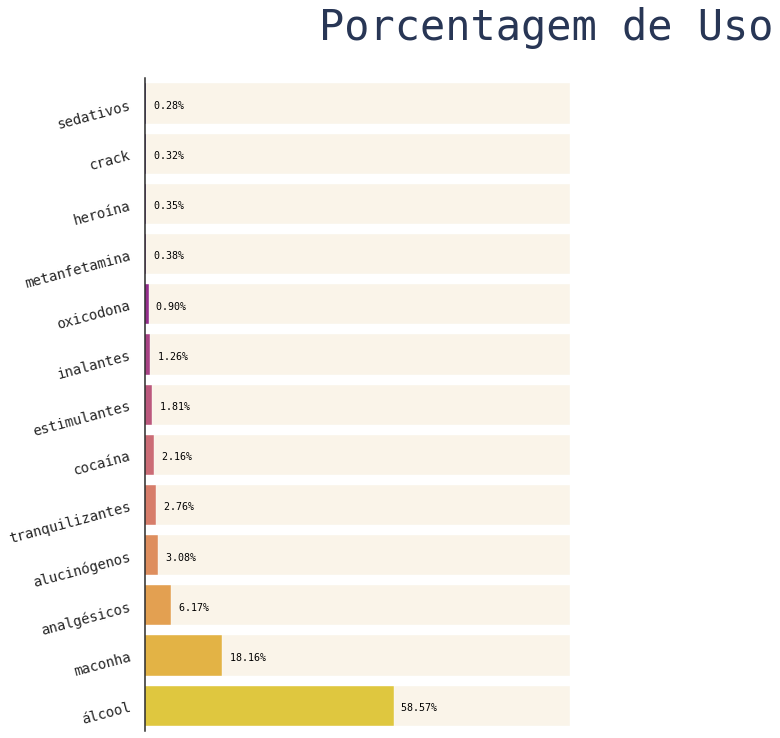

In [ ]:
plt.figure(figsize=(8,12))
sns.set_style("white")
plt.title('Porcentagem de Uso', fontsize = 42, fontname = 'monospace', x = 0.9, y = 1.05, color = '#283655')
a = sns.barplot(data = uso_drogas, x = 'Total', y = 'Drogas', color = 'oldlace')
b = sns.barplot(data = uso_drogas, x = 'Porcentagem de uso', y = 'Drogas', color = 'darkred',palette='plasma')
plt.xticks([])
plt.yticks(fontname = 'monospace', fontsize = 14, rotation = 15)
plt.ylabel('')
plt.xlabel('')


a.spines['left'].set_linewidth(1.5)
a.spines['top'].set_visible(False)
a.spines['bottom'].set_visible(False)
a.spines['right'].set_visible(False)

k = 0.1
for i in uso_drogas['Porcentagem de uso']:
  plt.text(i + 0.4,k,f'{i: .2f}%', color= 'black', fontname='monospace')
  k = k+ 1.0
 

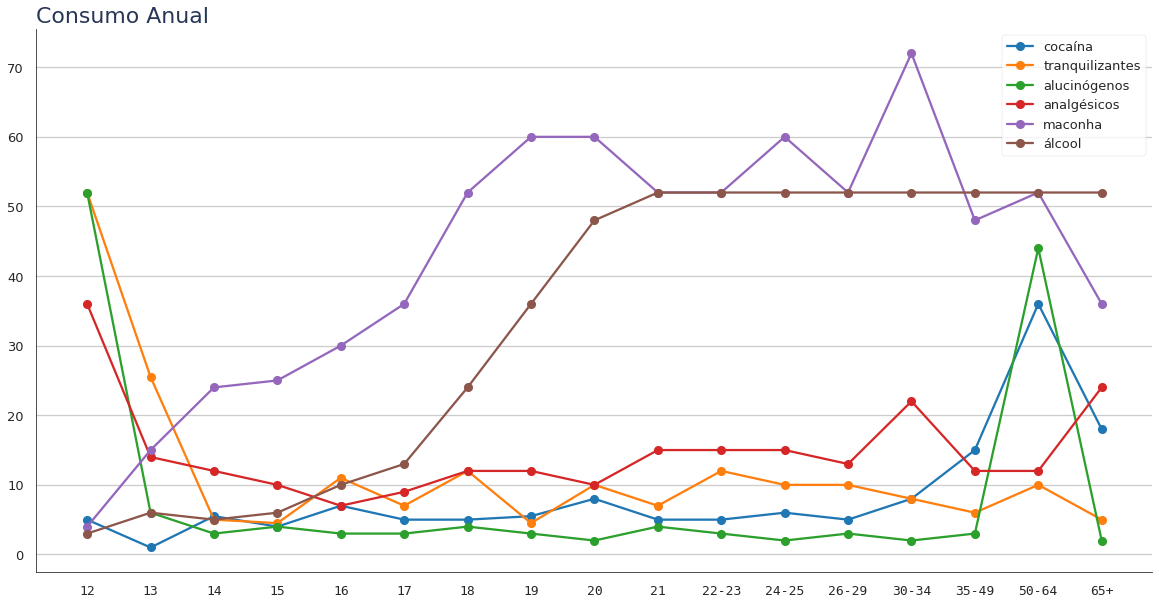

In [ ]:
# plt.figure(figsize=(20,10))
fig, ax = plt.subplots(figsize=(20,10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

drogas_mais_usadas = uso_drogas.tail(6)["Drogas"]
drogas_mais_usadas = list(drogas_mais_usadas[:])
drogas_mais_usadas = ["frequência-"+x for x in drogas_mais_usadas]
plt.grid(axis='y')

j = 0
for i in drogas_mais_usadas:
  plt.plot(drogas['idade'],drogas[i], label = drogas_mais_usadas[j].split('-')[1], marker = 'o')
  j = j+1

plt.title('Consumo Anual',fontsize = 22, color = '#283655', loc='left')

plt.xticks(fontname = 'monospace')
plt.legend()
plt.show()


In [ ]:
drogas_menor = drogas.head(6)
drogas_menor

,idade,n,uso-álcool,frequência-álcool,uso-maconha,frequência-maconha,uso-cocaína,frequência-cocaína,uso-crack,frequência-crack,uso-heroína,frequência-heroína,uso-alucinógenos,frequência-alucinógenos,uso-inalantes,frequência-inalantes,uso-analgésicos,frequência-analgésicos,uso-oxicodona,frequência-oxicodona,uso-tranquilizantes,frequência-tranquilizantes,uso-estimulantes,frequência-estimulantes,uso-metanfetamina,frequência-metanfetamina,uso-sedativos,frequência-sedativos
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,1.50,0.1,35.50,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,2.5,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.00,0.0,18.75,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,6.25,0.1,2.00,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.50,0.2,1.00,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.00,0.1,66.50,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.00,0.1,64.00,4.8,3.0,2.0,4.0,8.5,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5


In [ ]:
uso_drogas_menor = pd.DataFrame(columns=['Drogas','Porcentagem de uso','Total'],index=range(0,13))
uso_drogas_menor['Drogas'] = drogas_menor.columns.to_list()[2:28:2]
uso_drogas_menor['Drogas'] = uso_drogas_menor['Drogas'].apply(lambda x: x.split('-')[1])

uso_drogas_menor['Porcentagem de uso'] = porcentagem_uso(drogas_menor)
uso_drogas_menor = uso_drogas_menor.sort_values('Porcentagem de uso')
uso_drogas_menor['Total'] = [100.0]*len(uso_drogas_menor['Drogas'])

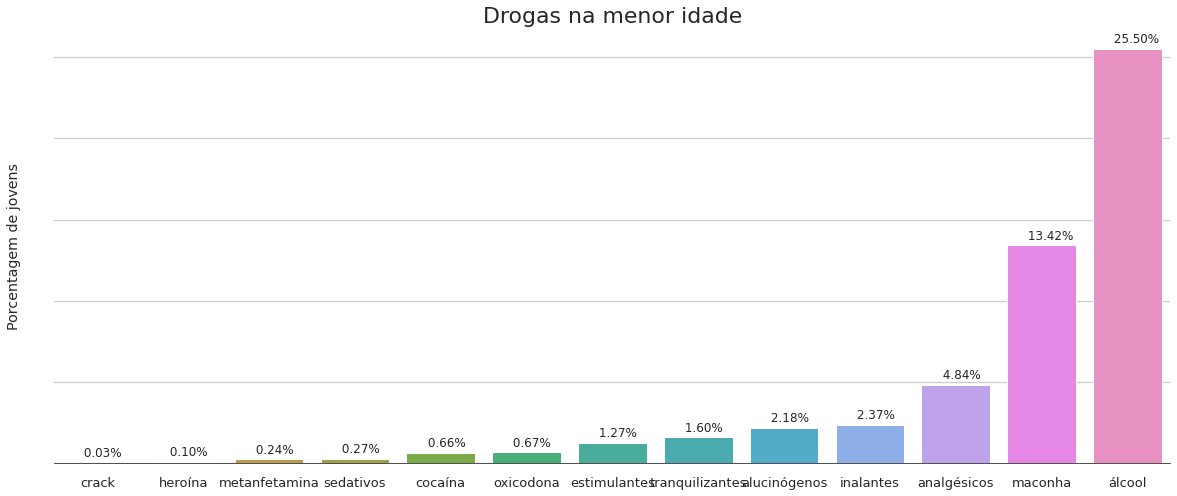

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))

sns.set_theme(style="whitegrid")
plt.title('Drogas na menor idade', fontsize = 22)
a = sns.barplot(x = 'Drogas', y = 'Porcentagem de uso', data = uso_drogas_menor)
plt.ylabel('Porcentagem de jovens')
plt.xlabel('')

plt.yticks(color = 'white')
sns.despine(left=True)
ax.grid(axis='y')

k = -0.2
for i in uso_drogas_menor['Porcentagem de uso']:
  plt.text(k,i+0.4,f'{i: .2f}%')
  k = k+ 1.0

plt.show()